<a href="https://colab.research.google.com/github/sp2005-im/Machine-Learning-Basics-Regression-And-Classification/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sri Rama Jayam
#Regression task
import numpy as np
import matplotlib.pyplot as plt
X = np.array([80,60,40,20,0,-20,-40,-60,-80,-100,-120,-140,-160,-180,-200,-220,-240,-260,-280,-300,-320,-340]) #Temperature in degrees Farenheit
Y = np.array([6.470,6.360,6.240,6.120,6.000,5.860,5.720,5.580,5.430,5.280,5.090,4.910,4.720,4.520,4.300,4.080,3.830,3.580,3.330,3.070,2.760,2.450]) #Coefficient of thermal expansion

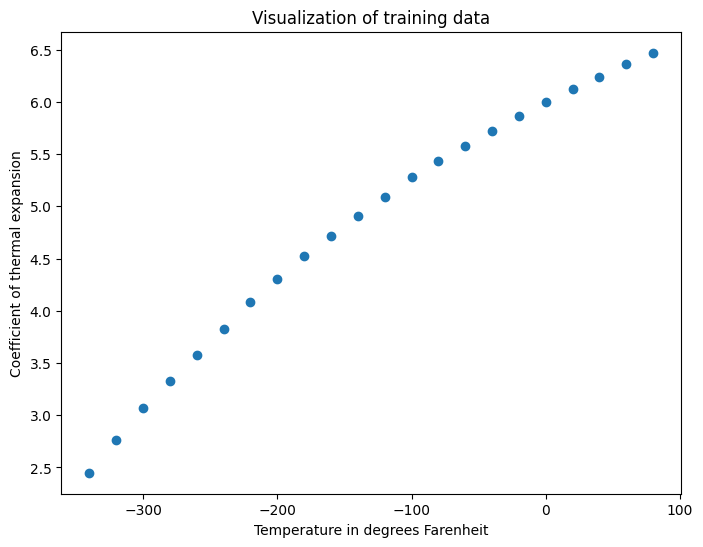

In [ ]:
#Visualizing the dataset
plt.figure(figsize = (8,6))
plt.scatter(X,Y)
plt.xlabel('Temperature in degrees Farenheit')
plt.ylabel('Coefficient of thermal expansion')
plt.title('Visualization of training data')
plt.show()

In [ ]:
import math as m
#Implement feature scaling
#Implement z score normalization
def mean(x):
  #x is numpy array
  t = x.shape[0]
  mean = 0
  for i in x:
    mean+=i
  mean/=t
  return mean
'''
#Test
x = np.array([1,2,3,4,5,6])
print('The mean of all values in the array x is:',mean(x))
'''

def standard_deviation(y):
  #x is a numpy array
  mn = mean(y)
  t = y.shape[0]
  var = 0
  for i in y:
    var+=((i-mn)**2)
  var/=t
  sd = m.sqrt(var)
  return sd

'''
#Test
y = np.array([4,2,5,8,6,11])
standard_deviation(y)
'''

def z_score(x):
  mn = mean(x)
  sd = standard_deviation(x)
  res = np.zeros(shape = x.shape)
  for i in range(x.shape[0]):
    res[i] = (x[i]-mn)/sd
  return res

'''
#Test
y = np.array([1, 2, 3, 4, 5])
print('The mean of the given array is: ', mean(y))
print('The standard deviation of the given array is: ',standard_deviation(y))
print('The z-score normalized array is: ',z_score(y))
'''

"\n#Test\ny = np.array([1, 2, 3, 4, 5])\nprint('The mean of the given array is: ', mean(y))\nprint('The standard deviation of the given array is: ',standard_deviation(y))\nprint('The z-score normalized array is: ',z_score(y))\n"

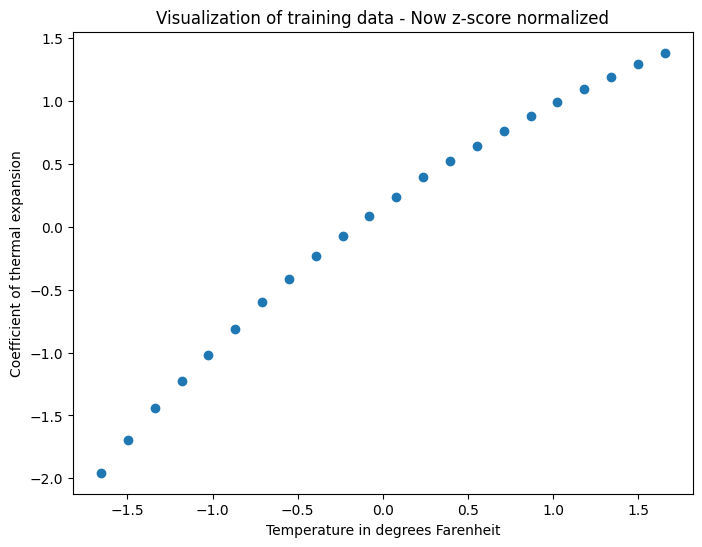

In [ ]:
#We can normalize the arrays we have and then plot them again
x1 = z_score(X)
y1 = z_score(Y)
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.xlabel('Temperature in degrees Farenheit')
plt.ylabel('Coefficient of thermal expansion')
plt.title('Visualization of training data - Now z-score normalized')
plt.show()

In [ ]:
#Cost function
def cost_gradient_calculator(w1,w2,b,x,y):
  #w1 -> scalar (weight)
  #w2 -> scalar (weight)
  #b -> scalar (bias)
  #x -> numpy array (features)
  #y -> numpy array (values)
  m = x.shape[0]
  y_hat = w1*(x**2)+w2*x+b
  j = np.sum((y_hat-y)**2)/(2*len(x))
  dj_dw1 = np.sum((y_hat-y)*(x**2))/(2*len(x))
  dj_dw2 = np.sum((y_hat-y)*(x))/(2*len(x))
  dj_db = np.sum((y_hat-y))/(2*len(x))
  return j,dj_dw1,dj_dw2,dj_db

In [ ]:
#Onto the regression task
#Trying some quadratic function
#Initializing the values
w1 = 0.25
w2 = 1
b = -0.25

In [ ]:
#Gradient Descent

def gradient_descent(w1,w2,b,x,y,alpha = 0.1,num_iter = 10000):
  #w1 -> scalar (weight)
  #w2 -> scalar (weight)
  #b -> scalar (bias)
  #x -> numpy array (features)
  #y -> numpy array (values)
  #Initialized Values
  w1 = 0.25
  w2 = 1
  b = -0.25
  m = x.shape[0]
  cost_history = []
  for i in range(num_iter):
    j,dj_dw1,dj_dw2,dj_db = cost_gradient_calculator(w1,w2,b,x,y)
    w1-=alpha*dj_dw1
    w2-=alpha*dj_dw2
    b-=alpha*dj_db
    cost_history.append(j)
  return w1,w2,b,cost_history

In [ ]:
#Onto the regression task
#Trying some quadratic function
#Initializing the values
w1 = 0.25
w2 = 1
b = -0.25

In [ ]:
w1,w2,b,cost_history = gradient_descent(w1,w2,b,x1,y1,alpha = 0.01,num_iter=10000)
print(w1,w2,b)

-0.1641554552115482 0.9891076353490349 0.1641554393672612


In [ ]:
y_hat = w1*x1**2+w2*x1+b

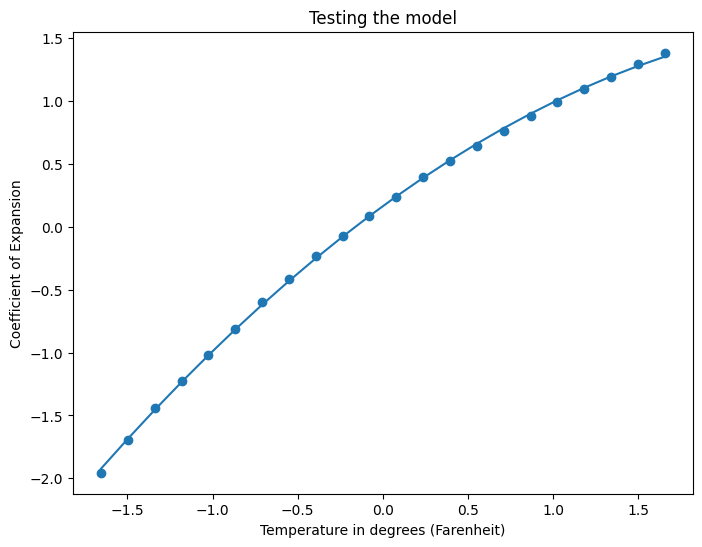

In [ ]:
#Plotting for the values of the values obtained
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.plot(x1,y_hat)
plt.xlabel('Temperature in degrees (Farenheit)')
plt.ylabel('Coefficient of Expansion')
plt.title('Testing the model')
plt.show()

In [ ]:
num_iter = 10000
num_array = np.arange(num_iter)
num_array+=1
num_array

array([    1,     2,     3, ...,  9998,  9999, 10000])

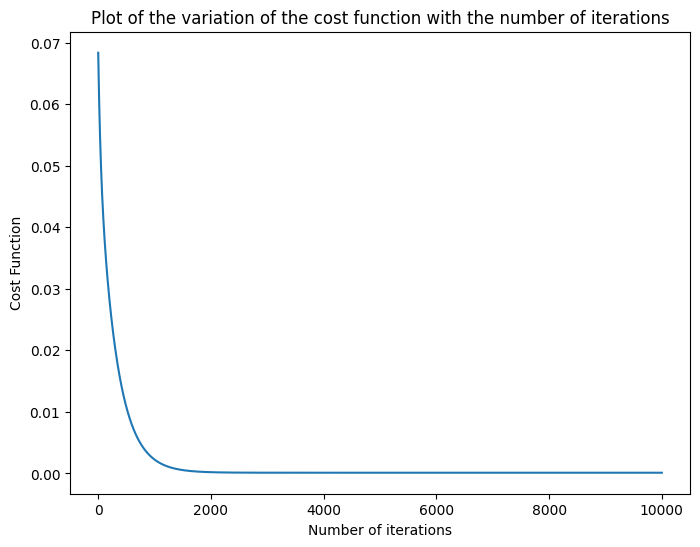

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(num_array,cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.title('Plot of the variation of the cost function with the number of iterations')
plt.show()

In [ ]:
print("The intitial value of the cost function is: ", cost_history[0])
print("The final value of the cost function is: ", cost_history[9999])

The intitial value of the cost function is:  0.06836426301908567
The final value of the cost function is:  0.00012118219274247334


In [ ]:
#Let us now try a